# Interactive output of DCGAN-Training

## Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from DCGAN import DCGAN
from Generator import Generator
import datetime
import os
from ImageWriterCallback import ImageWriterCallback

## Load data and prepare datagenerator

In [4]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

generator=Generator(images=x_train,batch_size=16)

## Preview Images to generate

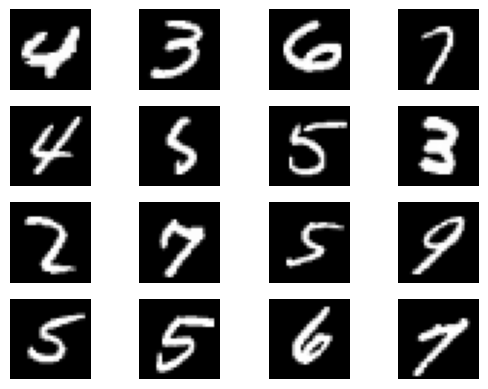

In [7]:
plt.figure()
for i in range(4*4):
        plt.subplot(4,4,i+1)
        plt.imshow(generator[0][i],cmap='gray',vmin=-1,vmax=1)
        plt.axis('off')
plt.show()


## Load DCGAN-model 

In [9]:
dcgan=DCGAN()
dcgan.print_model_summary()
dcgan.compile()

generator:
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1568)              158368    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32) 

## Create log-folders

In [10]:
time_stamp=datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
log_dir='./logs/'+time_stamp
os.makedirs(log_dir)
os.makedirs(log_dir+'/images')

## Configure callbacks and start training

In [11]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir)
image_writer_callback=ImageWriterCallback(log_dir+'/images')
history=dcgan.fit(generator,epochs=50,callbacks=[tensorboard_callback,image_writer_callback])

Epoch 1/50
3750/3750 [==============================] - 40s 10ms/step - generator_loss: 0.4849 - discriminator_loss: 0.0043
Epoch 2/50
3750/3750 [==============================] - 38s 10ms/step - generator_loss: 0.2981 - discriminator_loss: 0.0621
Epoch 3/50
3750/3750 [==============================] - 39s 10ms/step - generator_loss: 0.2509 - discriminator_loss: 0.0764
Epoch 4/50
3750/3750 [==============================] - 39s 10ms/step - generator_loss: 0.2737 - discriminator_loss: 0.0702
Epoch 5/50
3750/3750 [==============================] - 40s 10ms/step - generator_loss: 0.2896 - discriminator_loss: 0.0665
Epoch 6/50
3750/3750 [==============================] - 39s 10ms/step - generator_loss: 0.2950 - discriminator_loss: 0.0659
Epoch 7/50
3750/3750 [==============================] - 39s 10ms/step - generator_loss: 0.2973 - discriminator_loss: 0.0658
Epoch 8/50
3750/3750 [==============================] - 40s 11ms/step - generator_loss: 0.2987 - discriminator_loss: 0.0658
Epoch 9/

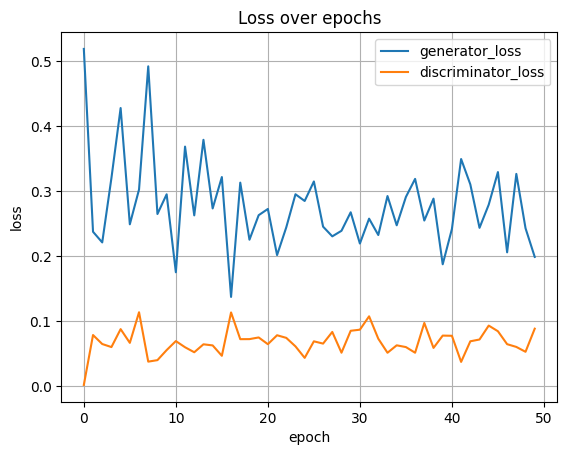

In [15]:
plt.figure()
plt.plot(history.history['generator_loss'])
plt.plot(history.history['discriminator_loss'])
plt.title('Loss over epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['generator_loss','discriminator_loss'])
plt.grid()
plt.show()

## Generate random images with DCGAN

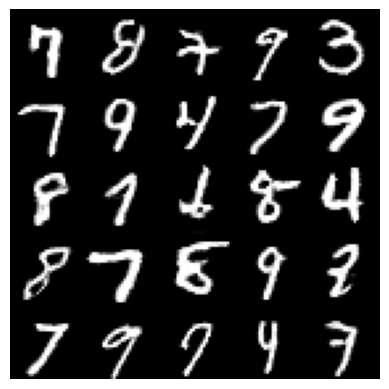

In [22]:
amount_of_rows_cols=5
noise = tf.random.normal(shape=(amount_of_rows_cols**2, dcgan.latent_dim), mean=0, stddev=1)

fake_images=dcgan.generate_images(noise)
_,height,width,depth=fake_images.shape
generated_images=np.zeros((amount_of_rows_cols*height,amount_of_rows_cols*width,1))

n=0
for i in range(amount_of_rows_cols):
    for j in range(amount_of_rows_cols):
        generated_images[i*height:(i+1)*height,j*width:(j+1)*width,:]=fake_images[n]
        n+=1
plt.figure()
plt.imshow(generated_images,cmap='gray',vmin=-1,vmax=1)
plt.axis('off')
plt.show()